In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Part A: EXPLORATORY DATA ANALYSIS(EDA)

In [5]:
df=pd.read_csv("C:/Users/ASUS/Downloads/imdb_movie_dataset.csv")

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [6]:
df.shape

(1000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
df=df.dropna(subset=['Revenue (Millions)'])
df=df.dropna(subset=['Metascore'])

In [10]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [11]:
df.drop('Rank',axis=1,inplace=True)

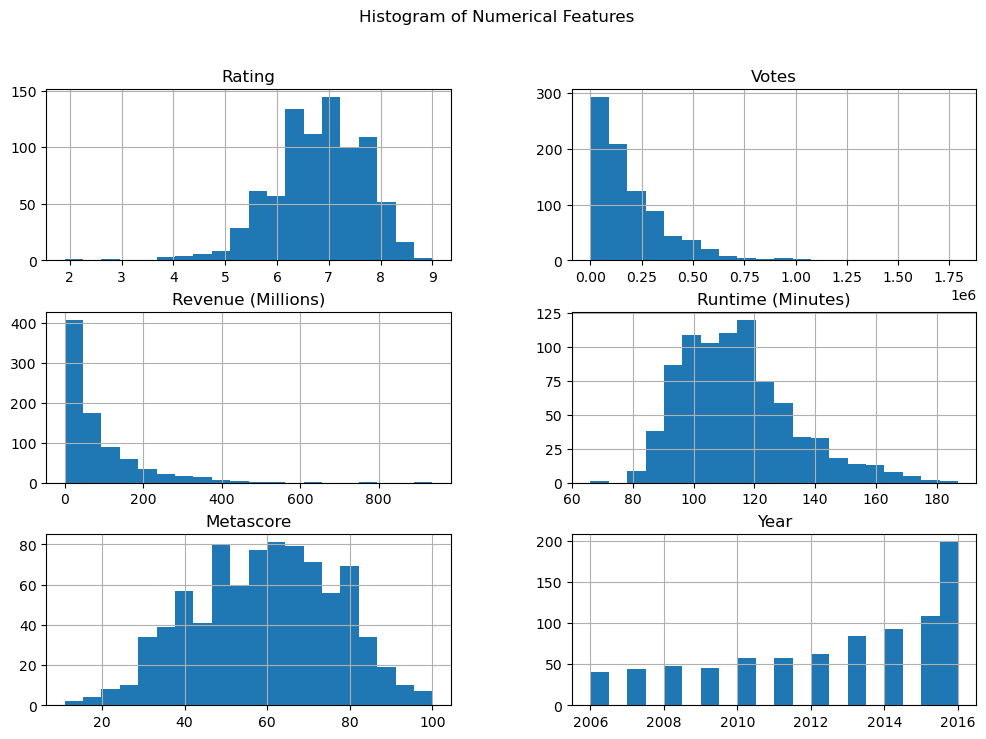

In [12]:
numerical_cols = ['Rating', 'Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Metascore', 'Year']

df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.show()

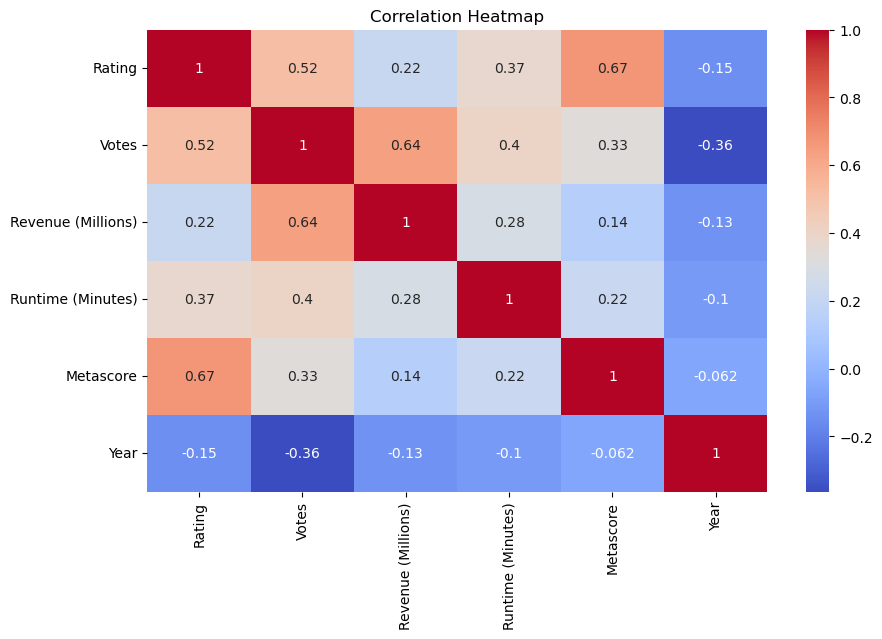

In [13]:
plt.figure(figsize=(10, 6))
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

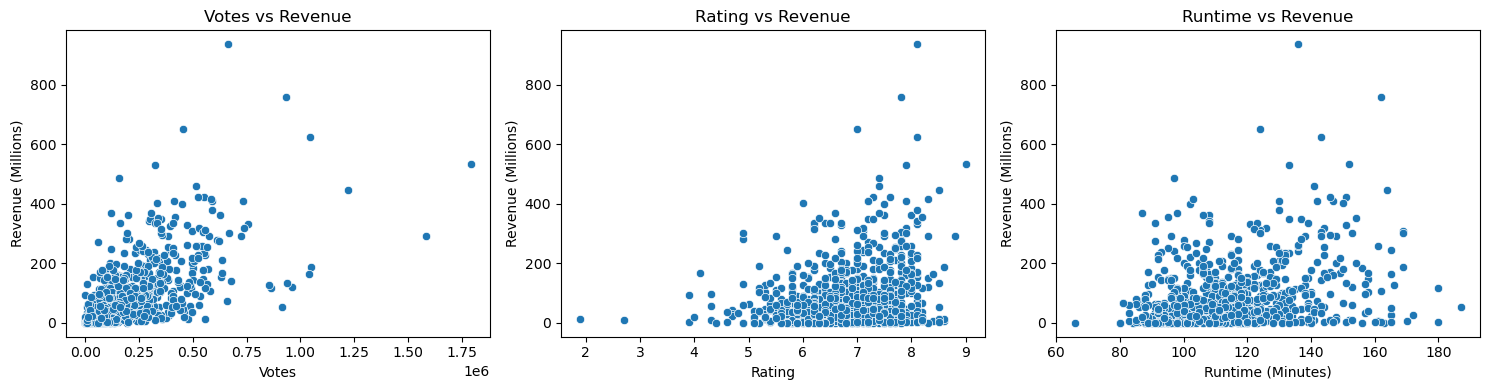

In [14]:

plt.figure(figsize=(15, 4))

#Votes vs Revenue
plt.subplot(1, 3, 1)
sns.scatterplot(x='Votes', y='Revenue (Millions)', data=df)
plt.title('Votes vs Revenue')

#Rating vs Revenue
plt.subplot(1, 3, 2)
sns.scatterplot(x='Rating', y='Revenue (Millions)', data=df)
plt.title('Rating vs Revenue')

#untime vs Revenue
plt.subplot(1, 3, 3)
sns.scatterplot(x='Runtime (Minutes)', y='Revenue (Millions)', data=df)
plt.title('Runtime vs Revenue')

plt.tight_layout()
plt.show()

# PART B: SIMPLE LINEAR REGRESSION

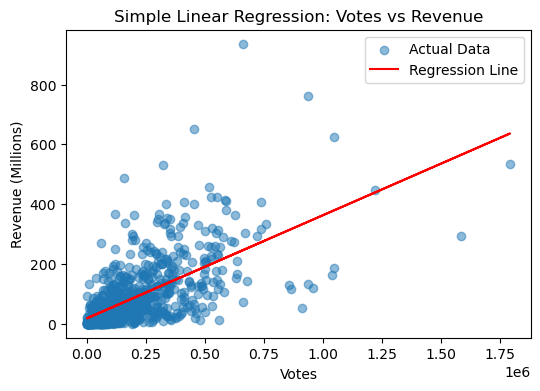

Mean Squared Error (MSE): 7841.167019920675
R-squared (R2 Score): 0.3881206111770378


In [15]:
X = df[['Votes']]      # Independent variable
y = df['Revenue (Millions)']     # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Votes')
plt.ylabel('Revenue (Millions)')
plt.title('Simple Linear Regression: Votes vs Revenue')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2 Score):", r2)

In [16]:
X = df[['Votes']]
y = df['Revenue (Millions)']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print("Slope (m):", slope)
print("Intercept (c):", intercept)

print("\nINTERPRETATION:")
print(f"Slope: For every 1 unit increase in Votes, Revenue increases by approximately {slope:.4f} units.")
print(f"Intercept: When Votes is 0, the predicted Revenue is approximately {intercept:.2f}.")

Slope (m): 0.0003447037730110154
Intercept (c): 17.957361620680402

INTERPRETATION:
Slope: For every 1 unit increase in Votes, Revenue increases by approximately 0.0003 units.
Intercept: When Votes is 0, the predicted Revenue is approximately 17.96.


# PART C: MULTIPLE LINEAR REGRESSION

MSE: 7766.68656032275
RMSE: 88.12880664301969
R² Score: 0.3939326360940243

Intercept: 105.41359939806755
Coefficients:
Votes: 0.00037650325753022646
Rating: -21.74130903376475
Runtime (Minutes): 0.4567155538188777
Metascore: 0.04380690308163033


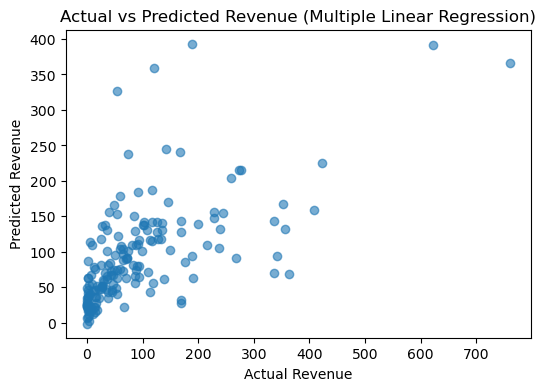

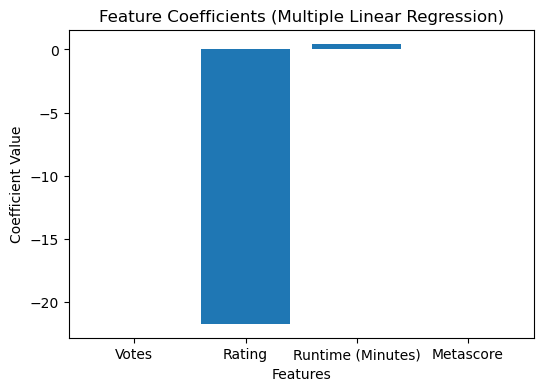

In [17]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


print("\nIntercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (Multiple Linear Regression)")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(X.columns, model.coef_)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients (Multiple Linear Regression)")
plt.show()

# PART D: POLYNOMIAL REGRESSION

LINEAR REGRESSION
MSE: 7841.167019920675
RMSE: 88.55036431274958
R2 Score: 0.3881206111770378

POLYNOMIAL REGRESSION
MSE: 7816.442909130372
RMSE: 88.41064929707491
R2 Score: 0.39004993799294774


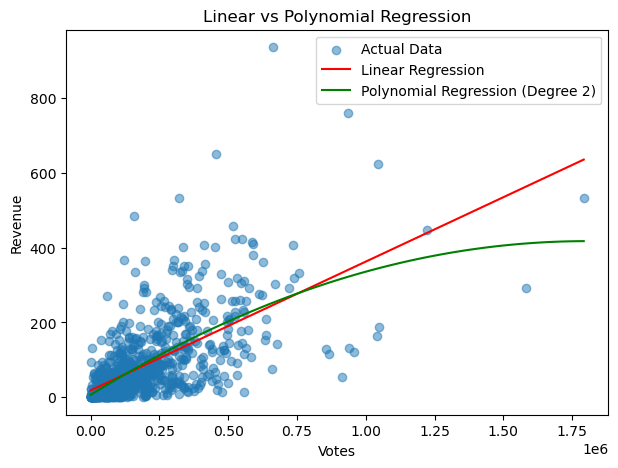

In [18]:

X = df[['Votes']]      # independent variable
y = df['Revenue (Millions)']     # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("LINEAR REGRESSION")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)
print("R2 Score:", r2_lin)

print("\nPOLYNOMIAL REGRESSION")
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("R2 Score:", r2_poly)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label="Actual Data")

plt.plot(X_range, lin_model.predict(X_range),
         color='red', label="Linear Regression")

plt.plot(X_range, poly_model.predict(poly.transform(X_range)),
         color='green', label="Polynomial Regression (Degree 2)")

plt.xlabel("Votes")
plt.ylabel("Revenue")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

# PART E: REGULARIZATION

LINEAR COEFFICIENTS:
Votes: 71.37108572241637
Rating: -18.991997628322288
Runtime (Minutes): 8.087310974321138
Metascore: 0.7450662339547525

RIDGE COEFFICIENTS:
Votes: 71.20227075419963
Rating: -18.859027230989145
Runtime (Minutes): 8.106337254331319
Metascore: 0.7060677045440427

LASSO COEFFICIENTS:
Votes: 71.1995881224645
Rating: -18.558373726357885
Runtime (Minutes): 7.970471580291512
Metascore: 0.4366044130398835


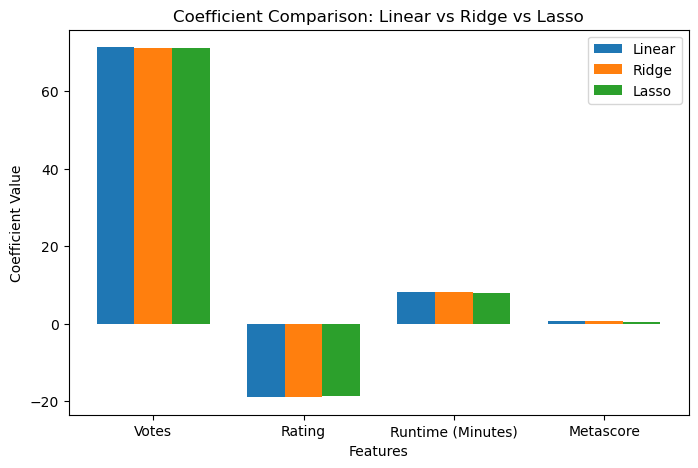

In [19]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

features = X.columns

lin_coef = lin_model.coef_
ridge_coef = ridge_model.coef_
lasso_coef = lasso_model.coef_

print("LINEAR COEFFICIENTS:")
for f, c in zip(features, lin_coef):
    print(f"{f}: {c}")

print("\nRIDGE COEFFICIENTS:")
for f, c in zip(features, ridge_coef):
    print(f"{f}: {c}")

print("\nLASSO COEFFICIENTS:")
for f, c in zip(features, lasso_coef):
    print(f"{f}: {c}")

x = np.arange(len(features))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, lin_coef, width, label='Linear')
plt.bar(x, ridge_coef, width, label='Ridge')
plt.bar(x + width, lasso_coef, width, label='Lasso')

plt.xticks(x, features)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.show()

# PART F: MODEL DIAGNOSTICS

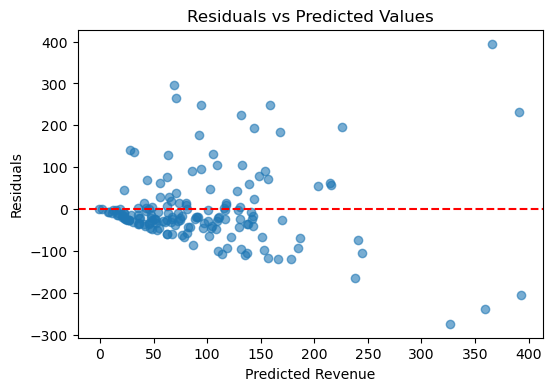

In [20]:
X = df[['Votes', 'Rating', 'Runtime (Minutes)', 'Metascore']]
y = df['Revenue (Millions)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()